# Yelp Data Challenge - Data Preprocessing

## Main tasks
1. Extract target data
    - 1.1 Read in business data
    - 1.2 Filter business data by city and category
    - 1.3 Keep relevant columns
    - 1.4 Save results to a csv file
    - 1.5 Use the "business_id" column to filter review data
    - 1.6 Further filter data by date
2. Exploratory data analysis (EDA)
    - 2.1 Bar plots
    - 2.2 Line plots
3. Save the final preprocessed dataset to a csv file

In [1]:
import json
import pandas as pd

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review.json',
    'dataset/tip.json',
    'dataset/user.json'
]

## 1. Extract target data

### 1.1 Read in business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


### 1.2 Filter data by city and category

#### Create filters/masks

* Filter business data by city and categories, so the dataframe will contain:
    * city located in "Las Vegas"
    * "Restaurants" in the category column

In [6]:
df_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ
3,"5000 Arizona Mills Cr, Ste 435","{'BusinessAcceptsCreditCards': True, 'Restaura...",8DShNS-LuFqpEWIp0HxijA,"[Sporting Goods, Shopping]",Tempe,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",0,33.383147,-111.964725,Sports Authority,,85282,9,3.0,AZ
4,581 Howe Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",1,41.119535,-81.475690,Brick House Tavern + Tap,,44221,116,3.5,OH


In [7]:
# Define a filter function 
def filter_on_df(df, city_name, category):
    # First filter the dataframe by the city
    filtered_df = df[df.city == city_name]
    filtered_df = filtered_df.reset_index()
    
    # Filter the dataframe by the categories
    # If 'Restaurants' in the categories, extract the corresponding index
    filtered_index = []
    for each in filtered_df.index:
        temp_cate = filtered_df.categories.iloc[each]
        if category in temp_cate:
            filtered_index.append(each)
            
    # Use a collected index list to extract the dataframe
    filtered_df = filtered_df.iloc[filtered_index]
    filtered_df = filtered_df.drop(columns=['index'])
    
    return filtered_df

In [8]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = filter_on_df(df_business, 'Las Vegas', 'Restaurants')
df_filtered.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
6,6730 S Las Vegas Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",Pd52CjgyEU3Rb8co6QfTPw,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",Las Vegas,"{'Monday': '8:30-22:30', 'Tuesday': '8:30-22:3...",1,36.066914,-115.170848,Flight Deck Bar & Grill,Southeast,89119,13,4.0,NV
7,"6889 S Eastern Ave, Ste 101","{'GoodForMeal': {'dessert': False, 'latenight'...",4srfPk1s8nlm1YusyDUbjg,"[Fast Food, Restaurants, Sandwiches]",Las Vegas,{},1,36.064652,-115.118954,Subway,Southeast,89119,6,2.5,NV
8,"6587 Las Vegas Blvd S, Ste 171","{'RestaurantsTableService': True, 'GoodForMeal...",n7V4cD-KqqE3OXk0irJTyA,"[Arcades, Arts & Entertainment, Gastropubs, Re...",Las Vegas,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,36.068259,-115.178877,GameWorks,Southeast,89119,349,3.0,NV
14,"4250 S Rainbow Blvd, Ste 1007","{'GoodForMeal': {'dessert': False, 'latenight'...",F0fEKpTk7gAmuSFI0KW1eQ,"[Italian, Restaurants]",Las Vegas,{},0,36.111057,-115.241688,Cafe Mastrioni,Spring Valley,89103,3,1.5,NV
19,3020 E Desert Inn Rd,"{'RestaurantsTableService': False, 'GoodForMea...",Wpt0sFHcPtV5MO9He7yMKQ,"[Restaurants, Fast Food, Burgers]",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,36.130013,-115.109310,McDonald's,Eastside,89121,20,2.0,NV


### 1.3 Keep relevant columns

* Only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [9]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [10]:
# Make a DataFrame that contains only the target columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [11]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business = df_selected_business.rename(columns={'stars': 'avg_stars'})

In [12]:
# Inspect your DataFrame
df_selected_business.head()

,business_id,name,categories,avg_stars
6,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
7,4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5
8,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"[Arcades, Arts & Entertainment, Gastropubs, Re...",3.0
14,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"[Italian, Restaurants]",1.5
19,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"[Restaurants, Fast Food, Burgers]",2.0


In [13]:
# I have 5899 rows and 4 columns in the selected dataframe
df_selected_business.shape

(5899, 4)

### 1.4 Save results to a csv file

In [14]:
# Save the selected dataframe into a csv file for the next task
df_selected_business.to_csv('dataset/selected_business.csv', index=False)

In [15]:
# Reload the csv file to check if everything works fine
pd.read_csv('dataset/selected_business.csv').head()

,business_id,name,categories,avg_stars
0,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"['Nightlife', 'Bars', 'Barbeque', 'Sports Bars...",4.0
1,4srfPk1s8nlm1YusyDUbjg,Subway,"['Fast Food', 'Restaurants', 'Sandwiches']",2.5
2,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"['Arcades', 'Arts & Entertainment', 'Gastropub...",3.0
3,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"['Italian', 'Restaurants']",1.5
4,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"['Restaurants', 'Fast Food', 'Burgers']",2.0


### 1.5 Use the "business_id" column to filter review data

* I want to make a DataFrame that only contain the reviews about the business entities I just obtained.

#### (1) Load review dataset

In [16]:
with open('/Users/wuchenhong/Documents/Bittiger/W5/Yelp_Data/dataset/review.json') as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
    
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


#### (2) Prepare dataframes to be joined on business_id

In [18]:
# Prepare the business dataframe by setting column "business_id" as an index, and name it as df_left
df_left = df_selected_business.set_index('business_id')
df_left.head()

,name,categories,avg_stars
business_id,,,
Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5
n7V4cD-KqqE3OXk0irJTyA,GameWorks,"[Arcades, Arts & Entertainment, Gastropubs, Re...",3.0
F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"[Italian, Restaurants]",1.5
Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"[Restaurants, Fast Food, Burgers]",2.0


In [19]:
# Prepare the review dataframe by setting column "business_id" as an index, and name it as df_right
df_right = df_review.set_index('business_id')
df_right.head()

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw


#### (3) Join two dataframes (business and review)

In [20]:
df_left.index = df_left.index.astype('str')
df_right.index = df_right.index.astype('str')

In [21]:
# Join df_left and df_right into one dataframe
joined_df = df_left.join(df_right)
joined_df.shape

(929606, 11)

In [22]:
# Each business_id has multiple records in the review dataframe
# That's why joined_df.shape is larger
# Verify the join is correct
print(len(joined_df.index.unique()))
print(df_left.shape)

5899
(5899, 3)


In [23]:
# Reset the index 
joined_df = joined_df.reset_index()

In [24]:
joined_df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2011-08-24,0,KEAHrqN-1DV0gmuNHM6Eww,5,As part of a birthday celebration weekend for ...,1,xP1IYu2eGfxMWV9tjrurIw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,8,2011-12-20,7,Jjz9W-wBkoBoMcB8ZQs5zQ,5,We had early reservations for a party of 9 for...,9,9bxdPvAhP6cuipD5s2UnCg


### 1.6 Further filter data by date

* Otherwise a laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [25]:
# Define a date filter function that selects date after 2015-01-20
def filter_on_date(df, filtered_date):
    return(df[df.date > filtered_date].reset_index().drop(columns = ['index']))

In [26]:
# Filter the joined DataFrame and name it as df_final
df_final = filter_on_date(joined_df, '2015-01-20')

In [27]:
# Make sure the filter result is correct
print(df_final.date.min())
print(df_final.date.max())

2015-01-21
2017-12-11


In [29]:
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


## 2. Exploratory data analysis (EDA)

In [30]:
# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

In [31]:
# Count number of reviews by each business entity, and plot the result
count_per_business = df_final.groupby('business_id')['text'].count().values

# Compute an average of stars by each business entity, and plot the result
mean_star_per_business = df_final.groupby('business_id')['stars'].mean().values

# Count how many (how long) texts by each review. Does longer texts signify higher stars?
text_len_per_row = df_final.text.apply(lambda x: len(x))

In [32]:
df_final['text_length'] = text_len_per_row.values

In [33]:
unique_category = []
for categories in df_final.categories:
    for cate in categories:
        if cate not in unique_category:
            unique_category.append(cate)
            
print('In total,',len(unique_category),'categories')

In total, 386 categories


In [34]:
# Convert time-series information to datetime data type
# Append an additional column 'count' for the later visualization 
df_final.date = pd.to_datetime(df_final.date)
df_final['count'] = 1
df_final = df_final.set_index('date')

In [36]:
df_final.head()

,business_id,name,categories,avg_stars,cool,funny,review_id,stars,text,useful,user_id,text_length,count
date,,,,,,,,,,,,,
2016-03-31,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,341,1
2015-06-29,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,417,1
2015-03-16,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,493,1
2016-02-10,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,152,1
2017-02-14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,914,1


### 2.1 Bar plots

Text(0.5,1,'Count of review per business entity')

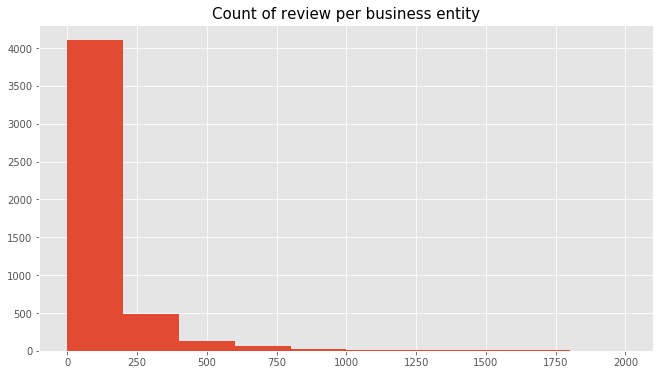

In [48]:
# Most of business entities have reviewed from 1 to 250 times
fig = plt.figure(figsize=(11, 6))
plt.hist(count_per_business, range = (0,2000))
plt.title('Count of review per business entity',fontsize = 15)

Text(0.5,1,'Average star per business entity')

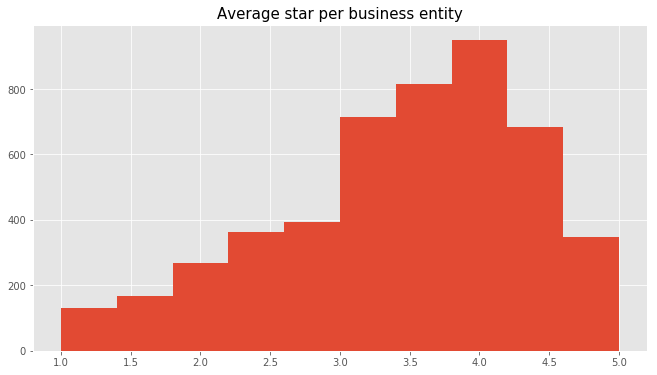

In [49]:
# Most of business entities scored around 4.0 stars on average
fig = plt.figure(figsize=(11, 6))
plt.hist(mean_star_per_business)
plt.title('Average star per business entity',fontsize = 15)

4


Text(0.5,1,'Length by each review')

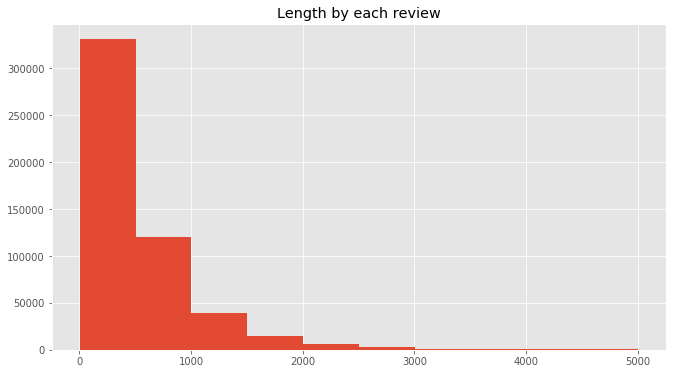

In [52]:
# In most of time, the length for each review is between 4 and 1000
fig = plt.figure(figsize=(11, 6))
print(min(text_len_per_row))
plt.hist(text_len_per_row)
plt.title('Length by each review')

### 2.2 Line plots

The last record was on 2017-12-11 00:00:00


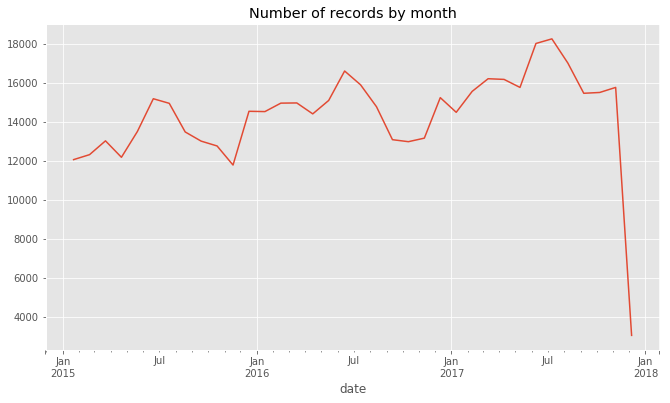

In [54]:
# Observed that a steady trend developed from Jan, 2015 to Dec, 2017 
# Moreover, three peaks were appeard on the same month (July)
# Perhaps because of the summer vacation, more poeple went to restaurants and left reviews
fig = plt.figure(figsize=(11, 6))
df_final['count'].resample("30D").sum().plot()
plt.title('Number of records by month')
print('The last record was on', max(df_final.index))

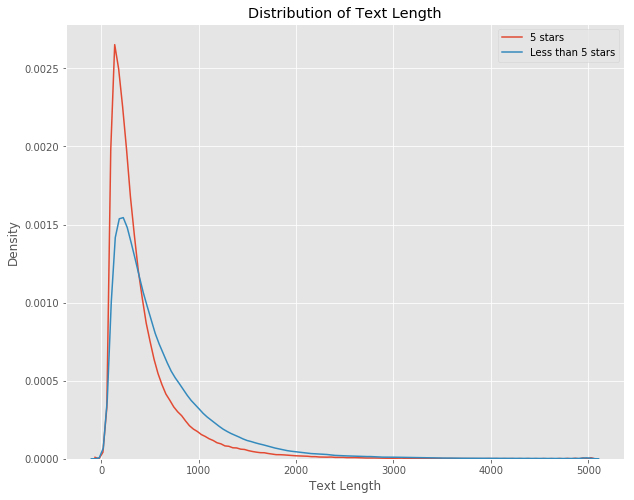

In [55]:
# Does longer texts usually result in a higher star score? 
# Examine the relationship between the length of text by each review and the star score
# Conclusion: the distribution is very different, longer texts appeared more when stars is 5 compared 
# with when stars less than 5

# Set the plot size
plt.figure(figsize = (10, 8))

# KDE plot of 5 stars
sns.kdeplot(df_final.loc[df_final['stars'] == 5, 'text_length'] , label = '5 stars')

# KDE plot of less than 5 stars
sns.kdeplot(df_final.loc[df_final['stars'] != 5, 'text_length'] , label = 'Less than 5 stars')

# Labeling of plot
plt.xlabel('Text Length'); plt.ylabel('Density'); plt.title('Distribution of Text Length');

## 3. Save the final preprocessed dataset to a csv file

In [56]:
# make sure it's the correct dataframe I want to store
df_final.reset_index().head()

,date,business_id,name,categories,avg_stars,cool,funny,review_id,stars,text,useful,user_id,text_length,count
0,2016-03-31,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,341,1
1,2015-06-29,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,417,1
2,2015-03-16,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,493,1
3,2016-02-10,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,152,1
4,2017-02-14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,914,1


In [57]:
# Not store any index in the csv file
df_final.to_csv("dataset/last_2_years_restaurant_reviews.csv", index = False)

In [58]:
# Read it back to make sure it's stored in a right way
pd.read_csv('dataset/last_2_years_restaurant_reviews.csv').head()

,business_id,name,categories,avg_stars,cool,funny,review_id,stars,text,useful,user_id,count,text_length
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,1,341
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,1,417
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,1,493
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,1,152
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,1,914
